Zomato Mumbai DataSet EDA

https://www.kaggle.com/sleepyowl007/zomato-mumbai-dataset

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [328]:
raw_df = pd.read_csv("Zomato_Mumbai_Dataset.csv",delimiter='|')

    Basic Analysis

In [329]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [330]:
raw_df.shape

(15081, 12)

In [331]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      15080 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [332]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,15080,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,32,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


In [333]:
# Checking redundunt rows of data

bad_data = raw_df['PAGE NO'] == 'PAGE NO'
raw_df[bad_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [334]:
bad_data.to_frame().groupby('PAGE NO').size()

PAGE NO
False    14139
True       942
dtype: int64

In [335]:
raw_df = raw_df[~bad_data]

In [336]:
raw_df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,14139,14138,14137,14138,14138,14138,14138,14138,14073,14138,14138,14138
unique,12719,66,3182,1,240,13822,943,22,2550,31,34,1123
top,China Town,400,"North Indian,Chinese",Mumbai,Mira Road,https://www.zomato.com/mumbai/on-toes-1-malad-...,1,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,16,2042,841,14138,552,3,15,5262,1192,5112,2360,2360


In [337]:
raw_df.shape

(14139, 12)

In [338]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


    Drop columns not required for analysis

In [339]:
raw_df.drop(['URL', 'PAGE NO', 'CITY'], axis = 1, inplace=True)

In [340]:
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


    Handling Nulls

In [343]:
raw_df.isnull().sum()

NAME                0
PRICE               1
CUSINE_CATEGORY     2
REGION              1
CUSINE TYPE         1
TIMING             66
RATING_TYPE         1
RATING              1
VOTES               1
dtype: int64

In [344]:
raw_df[raw_df['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
raw_df = raw_df.drop(labels=15080, axis=0)

In [346]:
raw_df.isnull().sum()

NAME                0
PRICE               0
CUSINE_CATEGORY     1
REGION              0
CUSINE TYPE         0
TIMING             65
RATING_TYPE         0
RATING              0
VOTES               0
dtype: int64

In [347]:
raw_df.fillna('NA', inplace=True)

In [348]:
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

In [349]:
raw_df['RATING'].value_counts()

-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2.0           1
Name: RATING, dtype: int64

In [350]:
raw_df['RATING'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

In [351]:
raw_df['RATING'].value_counts()

0      3370
3.5    1094
3.4    1036
3.6     960
3.3     926
3.7     917
3.2     801
3.8     782
3.1     734
3.0     622
3.9     596
2.9     409
4.0     408
2.8     309
4.1     298
4.2     199
2.7     170
4.3     148
4.4      99
2.6      77
4.5      46
2.5      39
4.6      32
2.4      26
4.7      13
2.3      10
2.1       5
2.2       4
4.8       4
4.9       2
1.8       1
2.0       1
Name: RATING, dtype: int64

In [352]:
raw_df['VOTES'].value_counts()

-       2360
NEW      953
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: VOTES, Length: 1123, dtype: int64

In [353]:
raw_df['VOTES'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

In [354]:
raw_df['PRICE'] = raw_df['PRICE'].astype('int64')
raw_df['RATING'] = raw_df['RATING'].astype('float64')
raw_df['VOTES'] = raw_df['VOTES'].astype('int64')

In [355]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


In [356]:
raw_df['TIMING'].value_counts()

11am to 11pm(Mon-Sun)                              1192
11am to 12midnight(Mon-Sun)                         632
12noon to 12midnight(Mon-Sun)                       467
11am to 1130pm(Mon-Sun)                             309
10am to 10pm(Mon-Sun)                               267
                                                   ... 
1130am to 4pm,630pm to 1230AM...                      1
12midnight to 5am,12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM,12noon to 4pm,7pm to ...         1
12noon to 330pm,630pm to 12midnight...                1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: TIMING, Length: 2551, dtype: int64

In [357]:
temp_df = raw_df['TIMING'].str.split("(", n = 1, expand = True)
temp_df = temp_df[1].str.replace(')','',regex=True)

In [358]:
# Assigning the columns back to the raw_df dataframe

raw_df['TIMING'] = temp_df[0]
raw_df['DAYS_OPEN'] = temp_df[1]
raw_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Mon-Sun,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Mon-Sun,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Mon-Sun,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Mon-Sun,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Mon-Sun,Veľmi dobré,4.4,5995,Mon-Sun


In [359]:
# Checking for Null records in DAYS_OPEN column

raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
DAYS_OPEN          0
dtype: int64

In [360]:
# Replacing the Null values with 'NA'

raw_df.fillna('NA', inplace=True)

In [361]:
raw_df.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
DAYS_OPEN          0
dtype: int64

In [362]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.7+ MB


In [363]:
# Finding those restaurant whose has 0 Rating or Votes

useless_data = (raw_df['RATING'] == 0.0) | (raw_df['VOTES'] == 0)
raw_df[useless_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,Mon-Sun,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,Mon-Sun,None,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,Mon-Sun,None,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,Mon-Sun,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,Mon-Sun,Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,Mon-Sun,None,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,Mon-Sun,None,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,Mon-Sun,None,0.0,0,Mon-Sun
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,Mon-Sun,None,0.0,0,Mon-Sun


In [364]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe

raw_df = raw_df[~useless_data]

In [365]:
# Checking the unique values in the column

raw_df['RATING_TYPE'].value_counts()


Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
Ortalama            2
Bueno               2
İyi                 2
Buono               2
Dobré               2
Bom                 2
Priemer             2
Průměr              2
Muito Bom           2
Promedio            2
Muy Bueno           1
Sangat Baik         1
Média               1
Biasa               1
Skvělé              1
Baik                1
Çok iyi             1
Excelente           1
Velmi dobré         1
Media               1
Name: RATING_TYPE, dtype: int64

In [366]:
# Translating the texts into proper English text

raw_df['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw_df['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)

In [367]:
raw_df['RATING_TYPE'].value_counts()

Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: RATING_TYPE, dtype: int64

In [368]:
raw_df['REGION'].value_counts()

Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Hotel Emerald-- Juhu                   1
Trident-- Bandra Kurla Complex         1
Sea Princess-- Juhu                    1
Aureole Hotel-- Andheri East           1
Hotel Satkar Residency-- Majiwada      1
Name: REGION, Length: 237, dtype: int64

In [369]:
# Removing the irrelevant text from the Region column

raw_df['REGION'] = raw_df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)

In [370]:
# Removing the West & East from the Region column

raw_df['REGION'] = raw_df['REGION'].str.replace(' West| west| East| east','',regex=True)

In [371]:
raw_df['REGION'].value_counts()



Thane                726
Mira Road            412
Andheri              409
Malad                378
Kandivali            377
                    ... 
Flea Bazaar Café       3
Majiwada               3
Panvel                 2
CBD Belapur            1
Girgaon Chowpatty      1
Name: REGION, Length: 101, dtype: int64

In [372]:
# Replacing Small regions with Known region name

raw_df['REGION'] = raw_df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area|Mahakali','Andheri',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Kamothe','Sion',regex=True)
raw_df['REGION'] = raw_df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)


In [373]:
raw_df[raw_df.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,Mon-Sun,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Andheri,Quick Bites,Mon-Sun,Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,Mon-Sun,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,Mon-Sun,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,Mon-Sun,Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,Mon-Sun,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,Mon-Sun,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,Mon-Sun,Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,Mon-Sun,Good,3.6,120,Mon-Sun


In [374]:
raw_df = raw_df.drop_duplicates()

In [375]:
zomato_df = raw_df.copy()

In [376]:
zomato_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,Mon-Sun,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Mon-Sun,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Mon-Sun,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,Mon-Sun,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,Mon-Sun,Very Good,4.4,5995,Mon-Sun


In [377]:
zomato_df.shape

(10547, 10)

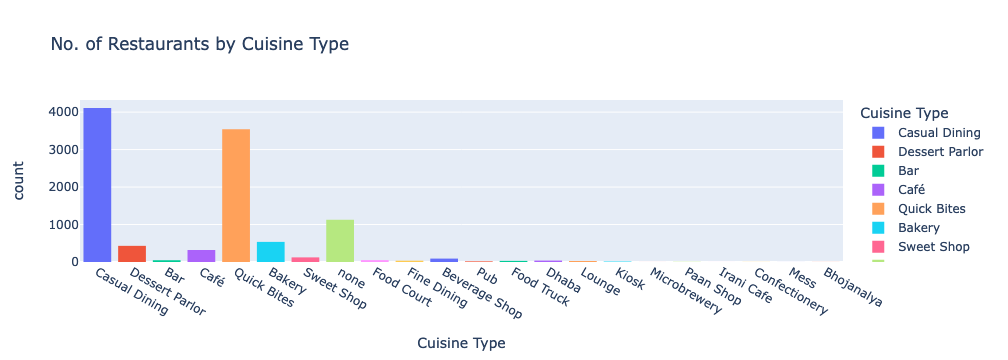

In [378]:
fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE', 
             title= 'No. of Restaurants by Cuisine Type', 
             labels={'CUSINE TYPE':'Cuisine Type'})

fig.show()

In [379]:
rating_type_df = zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,RATING TYPE,COUNT OF RESTAURANTS
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


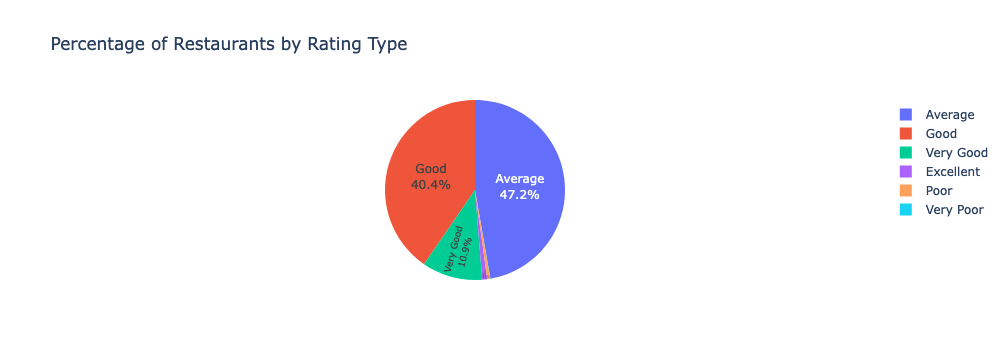

In [380]:
fig = px.pie(rating_type_df, names='RATING TYPE', values='COUNT OF RESTAURANTS', color='RATING TYPE', 
       title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [381]:
seafood_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,Mon-Sun,Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,Mon-Sun,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,Mon-Sun,Excellent,4.6,209,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,Mon-Sun,Excellent,4.5,573,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,Mon-Sun,Excellent,4.5,100,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,Mon-Sun,Excellent,4.5,178,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,Mon-Sun,Excellent,4.5,497,Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,Mon-Sun,Excellent,4.5,2068,Mon-Sun
903,Ferry Wharf,1500,"Seafood,Mangalorean",Bandra,Casual Dining,Mon-Sun,Very Good,4.4,459,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane,Casual Dining,Mon-Sun,Very Good,4.4,662,Mon-Sun


In [382]:
foodtruck_df = zomato_df[zomato_df['CUSINE TYPE'] == 'Food Truck']
foodtruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,Mon-Sun,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,Mon-Sun,Very Good,4.1,274,Mon-Sun


In [383]:
# Assuming restaurants having rating above 4.5

highest_rated_df = zomato_df[zomato_df['RATING'] >= 4.5]
highest_rated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,Mon-Sun,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,Mon-Sun,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,Mon-Sun,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,Mon-Sun,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,Mon-Sun,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,Mon-Sun,Excellent,4.5,1302,Mon-Sun
14234,Cone Culture,250,European,Kharghar,Casual Dining,Mon-Sun,Excellent,4.6,492,Mon-Sun
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,Mon-Sun,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,Mon-Sun,Excellent,4.5,754,Mon-Sun


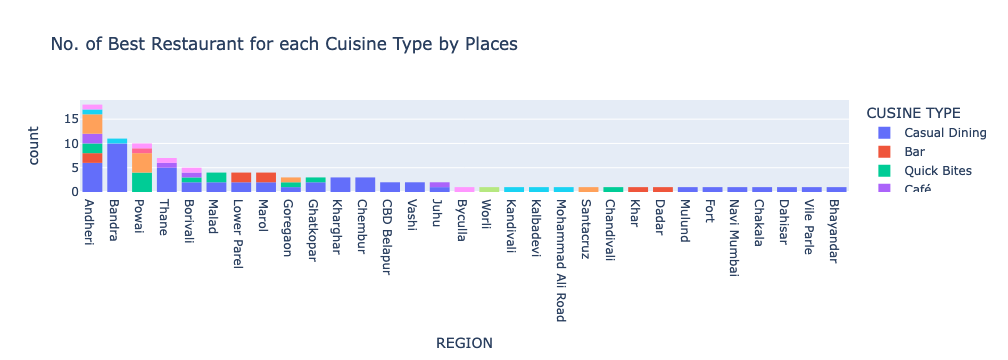

In [384]:
fig = px.histogram(highest_rated_df, x='REGION', color='CUSINE TYPE', 
             title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")

fig.show()

In [385]:
highest_rated_price_df = highest_rated_df.groupby(by=['REGION', 'CUSINE TYPE'])['PRICE'].mean().reset_index()
highest_rated_price_df.head()

,REGION,CUSINE TYPE,PRICE
0,Andheri,Bar,1600.0
1,Andheri,Café,800.0
2,Andheri,Casual Dining,1175.0
3,Andheri,Dessert Parlor,300.0
4,Andheri,Lounge,1700.0


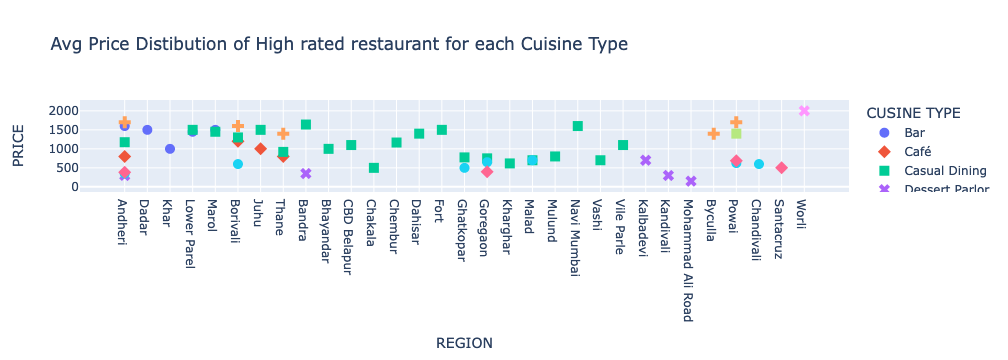

In [386]:
fig = px.scatter(highest_rated_price_df, x="REGION", y="PRICE", color="CUSINE TYPE", symbol="CUSINE TYPE", 
           title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)

fig.show()


In [387]:
chinese_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,Mon-Sun,Excellent,4.9,3529,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Mon-Sun,Very Good,4.2,337,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,Mon-Sun,Very Good,4.4,5995,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,Mon-Sun,Very Good,4.2,2042,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,Mon-Sun,Excellent,4.5,3058,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,Mon-Sun,Average,2.6,36,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,Mon-Sun,Average,3.3,13,Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,Mon-Sun,Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,Mon-Sun,Good,3.7,64,Mon-Sun


In [388]:
chinese_rest_df = chinese_df.groupby(by='REGION').agg({'NAME' : 'count', 'PRICE' : 'mean'}).rename(columns= {'NAME' : 'COUNT OF RESTAURANTS'}).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()

,REGION,COUNT OF RESTAURANTS,PRICE
3,Andheri,389,612.724936
70,Thane,371,590.983827
50,Mira Road,224,553.348214
44,Malad,186,604.032258
27,Goregaon,163,548.773006


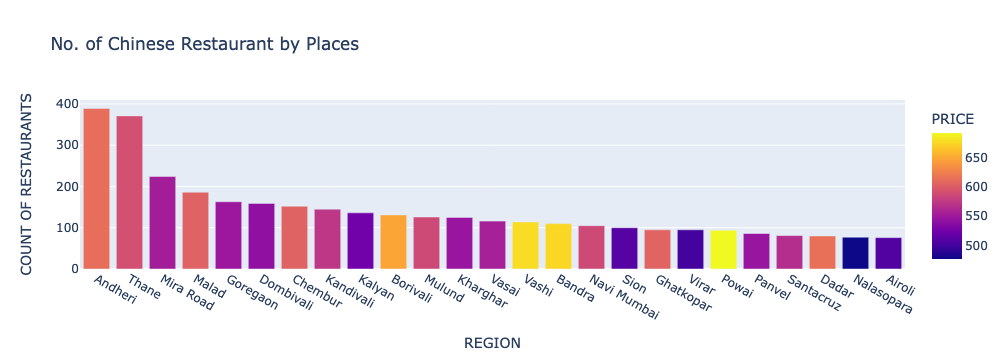

In [389]:
fig = px.bar(chinese_rest_df, x='REGION', y='COUNT OF RESTAURANTS', color='PRICE', title= 'No. of Chinese Restaurant by Places')

fig.show()


In [390]:
price_rating_df = zomato_df.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()
price_rating_df


,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


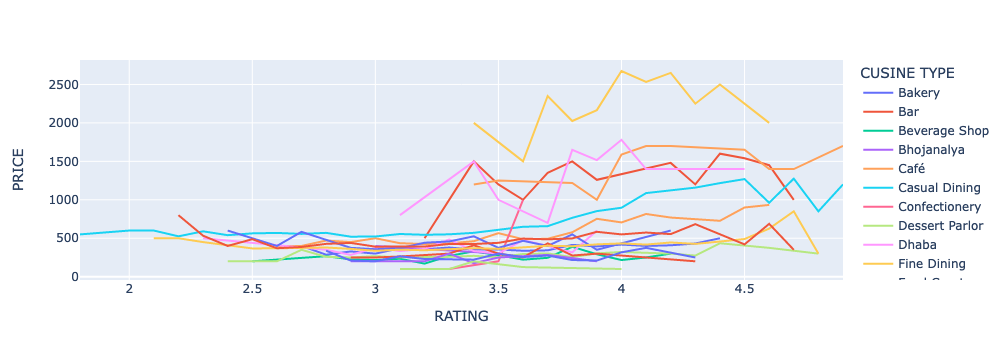

In [391]:
fig = px.line(price_rating_df, y="PRICE", x="RATING",color='CUSINE TYPE')

fig.show()


In [392]:
region_price_df = zomato_df.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price_df

,REGION,PRICE
0,Airoli,452.287582
1,Alibaug,665.000000
2,Ambernath,514.000000
3,Andheri,549.597765
4,Bandra,724.945946
...,...,...
74,Vikhroli,480.434783
75,Vile Parle,464.457831
76,Virar,452.027027
77,Wadala,427.500000


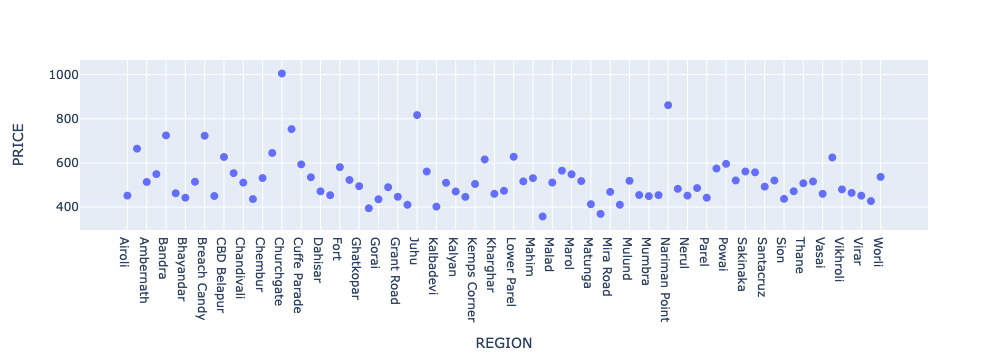

In [393]:
fig = px.scatter(region_price_df, x="REGION", y="PRICE").update_traces(marker_size=8)

fig.show()


In [394]:
max_price = zomato_df['PRICE'].max()
one_fourth_price = max_price/4
one_fourth_price


1250.0

In [395]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restaurants

aff_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
aff_rest_df = aff_rest_df[aff_rest_df['PRICE'] <= 1250]
aff_rest_df.sort_values(by='PRICE', inplace=True)
aff_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
6137,Sanjog Wine N Dine,5,"North Indian,Chinese",Thane,Casual Dining
2925,Jab We Eat,50,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum,none
9598,Ho5 Store,50,Fast Food,Matunga,none
9589,Golden Butterfly,100,"Bakery,Desserts",Mira Road,Bakery
5916,Madhuri Puranpoli,100,Maharashtrian,Vile Parle,none
...,...,...,...,...,...
2740,Peninsula Next,1200,"North Indian,Mughlai,Chinese",Sion,Casual Dining
5528,The Thekka,1200,"Finger Food,Continental,North Indian,Chinese",Vashi,Lounge
964,Bijoli Grill,1250,Bengali,Powai,Casual Dining
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250,Desserts,Parel,Dessert Parlor


In [396]:
# Finding the highest rated list of restaurants

highrate_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['RATING'] >= 4.5]
highrate_rest_df.sort_values(by='PRICE', inplace=True)
highrate_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites,4.5
807,Moussestruck,200,Desserts,Andheri,none,4.5
14234,Cone Culture,250,European,Kharghar,Casual Dining,4.6
725,Belo Pops,300,"Ice Cream,Desserts,Beverages",Andheri,none,4.5
...,...,...,...,...,...,...
5335,Mia Cucina,2000,Italian,Bandra,Casual Dining,4.5
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,4.6
8887,Drifters Tap Station,2000,"North Indian,Continental,European,American",Bandra,Casual Dining,4.5
12625,House of Mandarin,2100,"Chinese,Sushi,Asian",Bandra,Casual Dining,4.5


In [397]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['NAME', 'REGION'])
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
highrate_aff_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY', 
                                'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)

In [398]:
# Affordable Restaurants with low price and high rating 
highrate_aff_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor
1,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites
2,Moussestruck,200,Desserts,Andheri,none
3,Cone Culture,250,European,Kharghar,Casual Dining
4,Smiley Pops,300,"Desserts,Ice Cream,Beverages,Sandwich",Andheri,Dessert Parlor
...,...,...,...,...,...
60,Wild Dining Restaurant,1200,"North Indian,Continental,Mexican,Chinese",Andheri,Casual Dining
61,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
62,Culinary Tales,1200,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri,Casual Dining
63,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining
